# Part I - Loan Data from Prosper Dataset Exploration
## by Chris Menor

## Introduction

The dataset I will be analyzing is the Loan Data from Prosper. It includes 113,937 loans with 81 variables on each loan. Some of the variables include loan amount, borrower rate, current loan status, borrower income, borrow credit scores, and many more.

## Preliminary Wrangling

In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# load in the dataset into dataframe
dfloan = pd.read_csv('prosperLoanData.csv')

In [15]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

The structure of the dataset is 113,937 loans, and each loan has 81 variables. The data is split between borrowers info (income, credit score, etc) and Prosper loan info (loan number, payment amount, etc).

### What is/are the main feature(s) of interest in your dataset?

My main feature of interest is finding what factors can impact loant amount and payment. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe these factors are examples that will impact the loan payment/amount:

* Occupation
* Credit Score
* Income
* Borrower State
* Employment Duration

## Univariate Exploration

###  Histogram Function

In [16]:
def plot_histogram(dataframe, column_name, bins=30, kde=True, color='blue'):
    
    #Plots a histogram for a given column in a DataFrame.
    

    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe[column_name], bins=bins, kde=kde, color=color)
    
    # Set titles and labels
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    
    # Show plot
    plt.show()

### Bar Chart Function

In [17]:
def plot_bar_chart(dataframe, column_name, order=None, color='blue'):
   
    #Plots a bar chart for a given categorical column in a DataFrame.
    


    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart
    sns.countplot(x=column_name, data=dataframe, order=order, color=color)
    
    # Set titles and labels
    plt.title(f'Count of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()

* In this section, I will be looking at the distributions of individual variables.
* I will ask 2 questions and analyze them with  a histogram and a bar chart

### Question
What is the distribution of the lower bound of credit scores? 

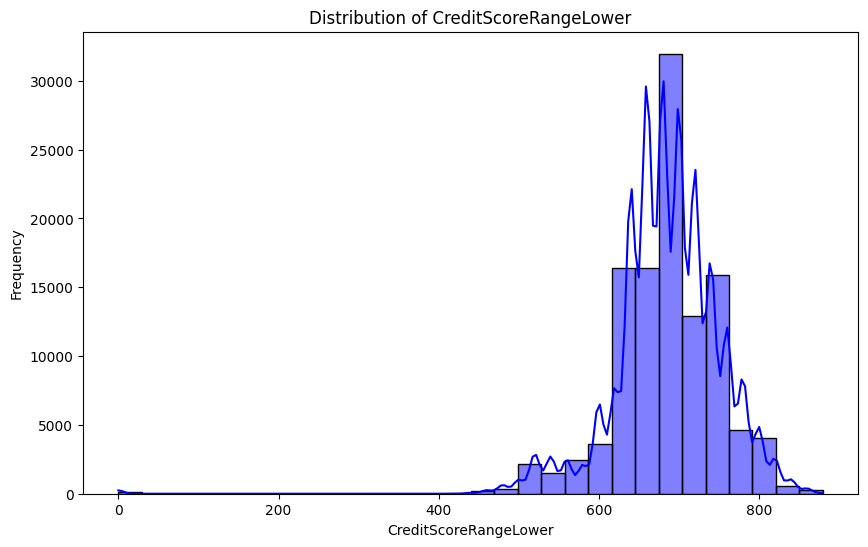

In [18]:
# Create a histogram for credit score
plot_histogram(dfloan, 'CreditScoreRangeLower')

In [19]:
#finding the average lower range credit score
average_credit_score_lower = dfloan['CreditScoreRangeLower'].mean()

# Print the result
print(f"The average of the CreditScoreRangeLower column is: {average_credit_score_lower:.2f}")


The average of the CreditScoreRangeLower column is: 685.57


Observations - The average credit score is 685.57, and most of the loans fall inbetween the ~600 to 800 credit score range.

#### Question
What are the number of loans in different statuses? Statues includes Current, Completed, Chargedoff, etc. 

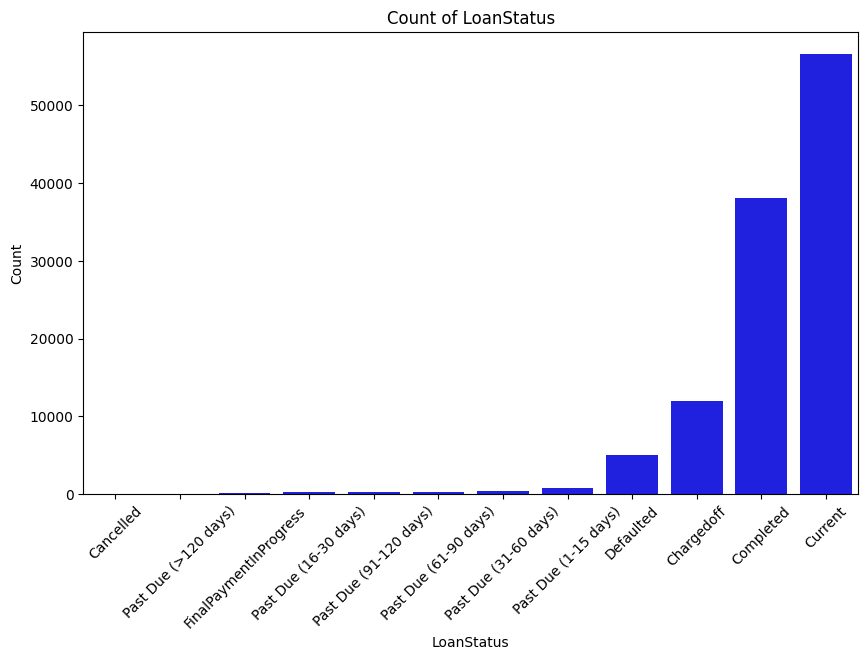

In [20]:
# Bar chart for loan status
plot_bar_chart(dfloan, 'LoanStatus', order=dfloan['LoanStatus'].value_counts().index[::-1])


Observations - A majority of the loans were either Current or Completed, with the Completed being a suprising number.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The credit score distribution mades sense as the majority of loans were given out to scores of low 600s to high 700s. There will most likely be a vast difference between loans in the 600s and in the high 700s.

For the LoanStatus distribution, the unusual points to me were how many Chargeoff and Defaulted loans were compared to total amount that were in past due. I would have expected more in those categories, but depending on how long the Prosper bank have been around, the total numbers could make sense.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

For the 2 visualizations, I was able to perform the analysis on clean data. The columns that I used needed no transformation or cleaning.

## Bivariate Exploration

#### Question
What is the relationship between BorrowerAPR and the lower range credit score. This can help us understand if there is any correlation between a borrower's APR and their lower credit score range.

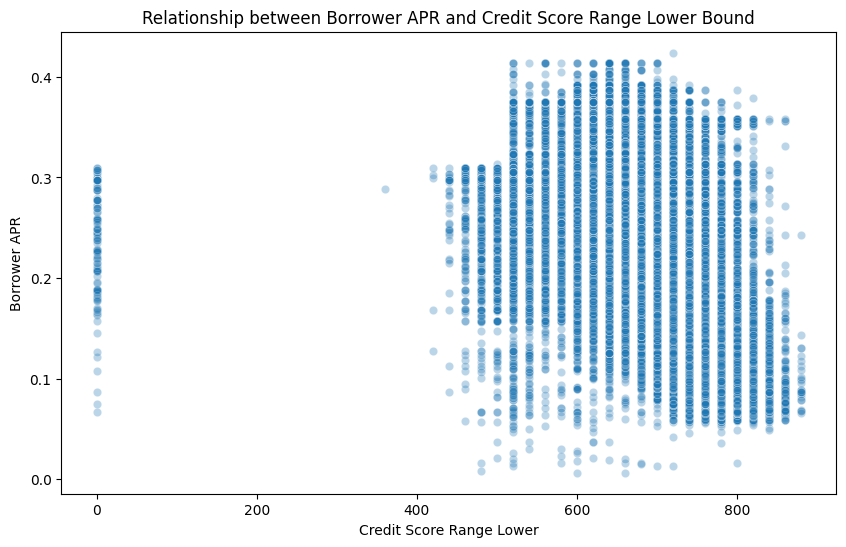

In [21]:
# Scatter plot for BorrowerAPR vs credit score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfloan, x='CreditScoreRangeLower', y='BorrowerAPR', alpha=0.3)  # Set alpha to 0.3 for transparency

# Set titles and labels
plt.title('Relationship between Borrower APR and Credit Score Range Lower Bound')
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Borrower APR')

# Show plot
plt.show()

Observation - Based on the graph, there are a higher concentration of lower APRs the higher the credit score is. When looking at specifically the 0.05 to 0.15 range, you can see the there are less in the 400 to 600 credit score range compared to the 600 to 800+ range.

#### Question
How is BorrowAPR distributed across the different variables of LoanStatus. This can give us insight if there are any differences in APR based on loan status.

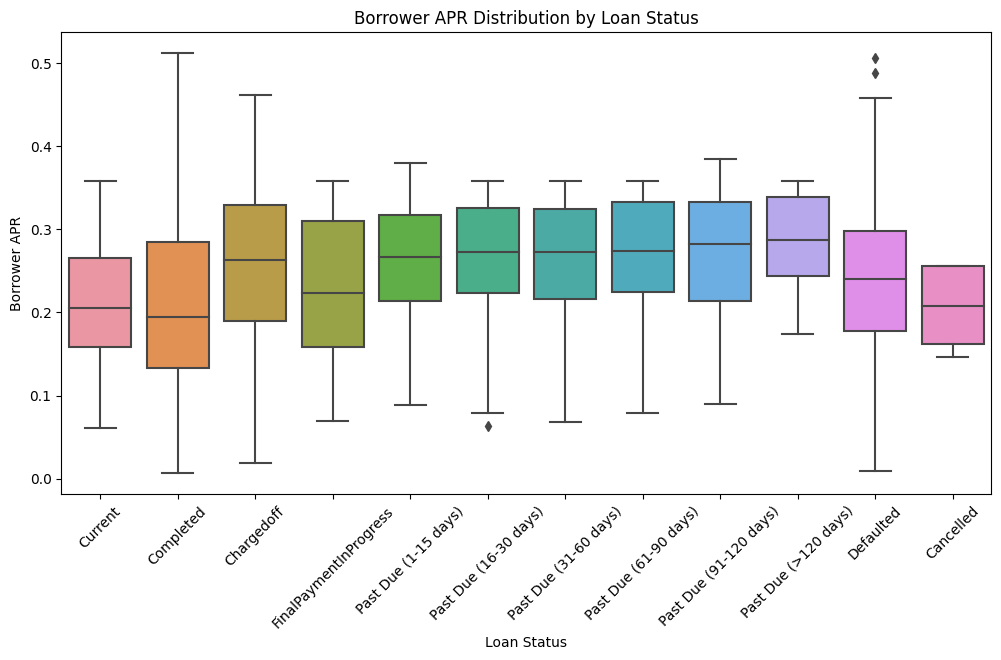

In [22]:
# Box plot for BorrowerAPR across different LoanStatus categories

loan_status_order = [
    'Current', 'Completed', 'Chargedoff', 'FinalPaymentInProgress',
    'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
    'Defaulted', 'Cancelled'
]

# Box plot for BorrowerAPR across different LoanStatus categories with specified order
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfloan, x='LoanStatus', y='BorrowerAPR', order=loan_status_order)

# Set titles and labels
plt.title('Borrower APR Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

Observation - There seems to not be much of a variance in borrow APR when looking at difference status. What you do see is that while the "Completed" status has one of the largest range of APR, the negative status like "Past Due" have a smaller range and are slightly higher.

#### Question
How does the count of different loan status vary across different employment statuses?

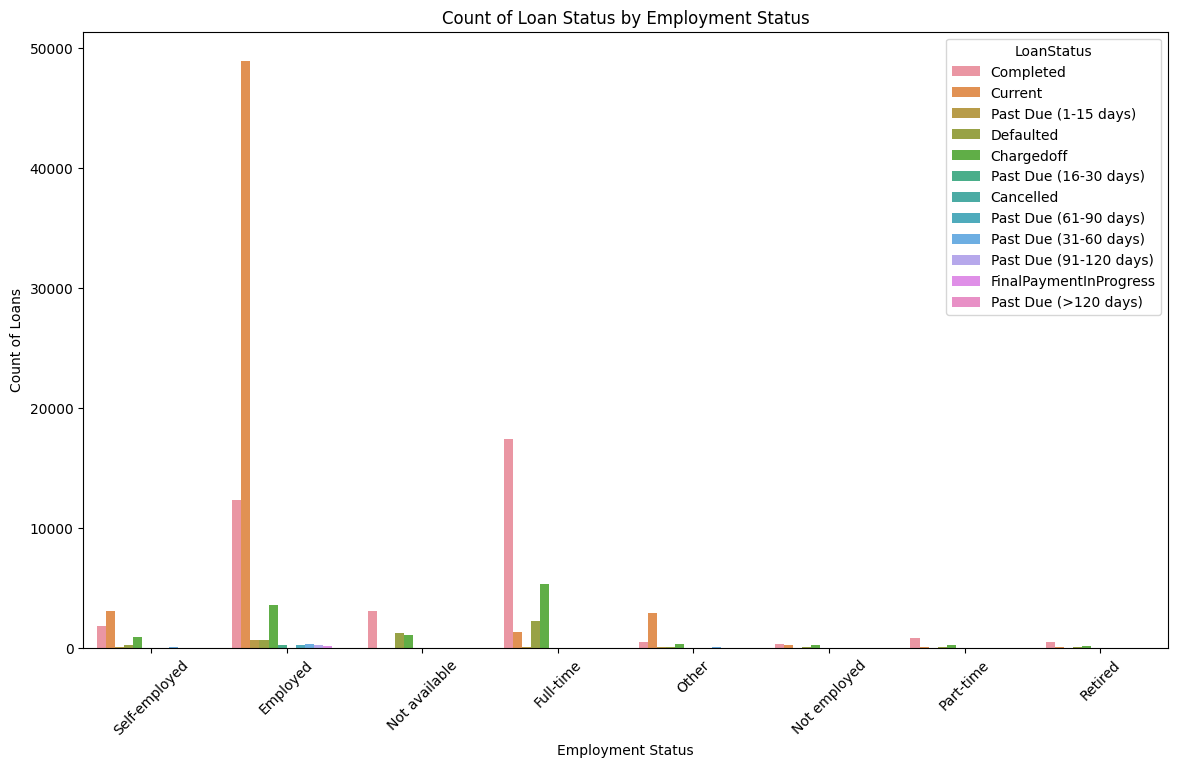

In [23]:
# Clustered bar chart for LoanStatus across different EmploymentStatus categories
plt.figure(figsize=(14, 8))
sns.countplot(data=dfloan, x='EmploymentStatus', hue='LoanStatus')

# Set titles and labels
plt.title('Count of Loan Status by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count of Loans')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

Observation - By far, most of the current loans are held by employed individuals. Full time, employed individuals are the majority of current and completed loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was very interesting seeing how the higher credit scores are concentrated with the lower APR. I did not expect there to be so many higher APRs loans are held with high credit score users. It would be interesting to see if maybe the year the loan was obtained had an affect on that. Maybe the higher APR made sense in the context of the year.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I thought there would be a bigger correlation between the Past Due status and APR. I would expect a more distinct difference to be displayed visually. 

## Multivariate Exploration

### Question

How does the relationshop between the lower bound of credit scores and the borrower APR vary across different employment statuses?

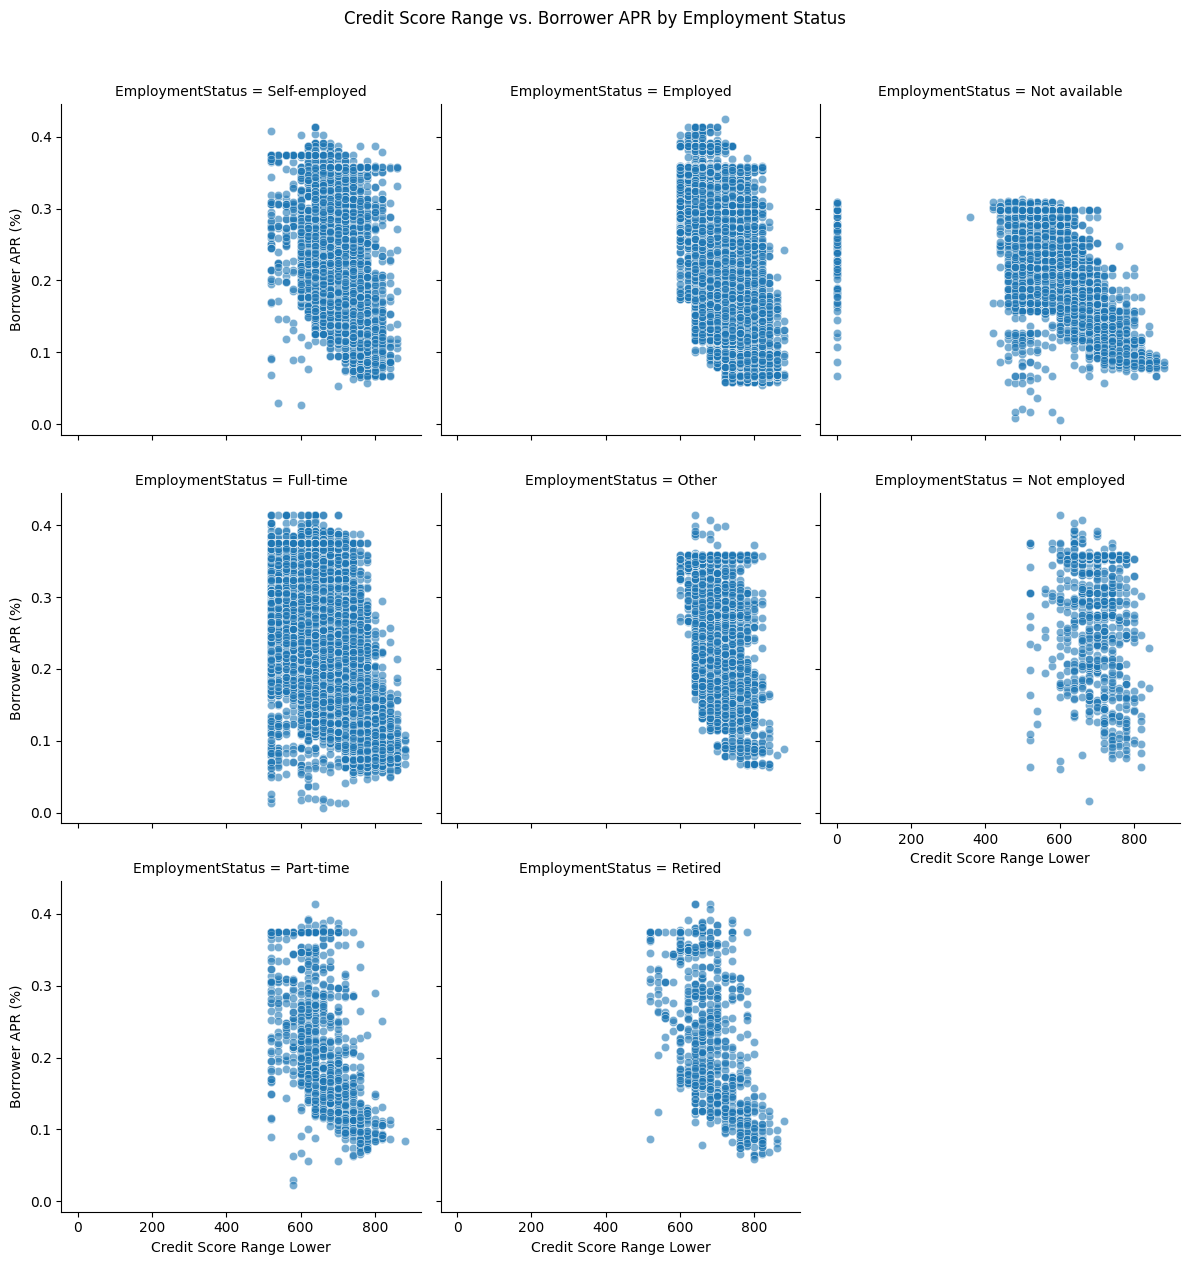

In [24]:
# FacetGrid plot of credit score vs BorrowerAPR faceted by EmploymentStatus
g = sns.FacetGrid(dfloan, col='EmploymentStatus', col_wrap=3, height=4)
g.map(sns.scatterplot, 'CreditScoreRangeLower', 'BorrowerAPR', alpha=0.6)

# Set titles and labels
g.set_axis_labels('Credit Score Range Lower', 'Borrower APR (%)')
g.fig.suptitle('Credit Score Range vs. Borrower APR by Employment Status', y=1.05)

plt.show()

Observations - One interesting thing I notice is the stark difference between full time and part time. While it's obvious that income with part time will typically be lower, but I didn't think there would be a large difference between full time and part time when looking at low APR low credit score individuals. I expected those sections would look similar, it seems that the higher income made up for the lower credit scores.

### Question
What are the pairwise relationships between key financial variables, such as credit score, borrower APR, loan amount and debt to income ratio? We will also color the plots by Prosper Rating to add another layer of information.

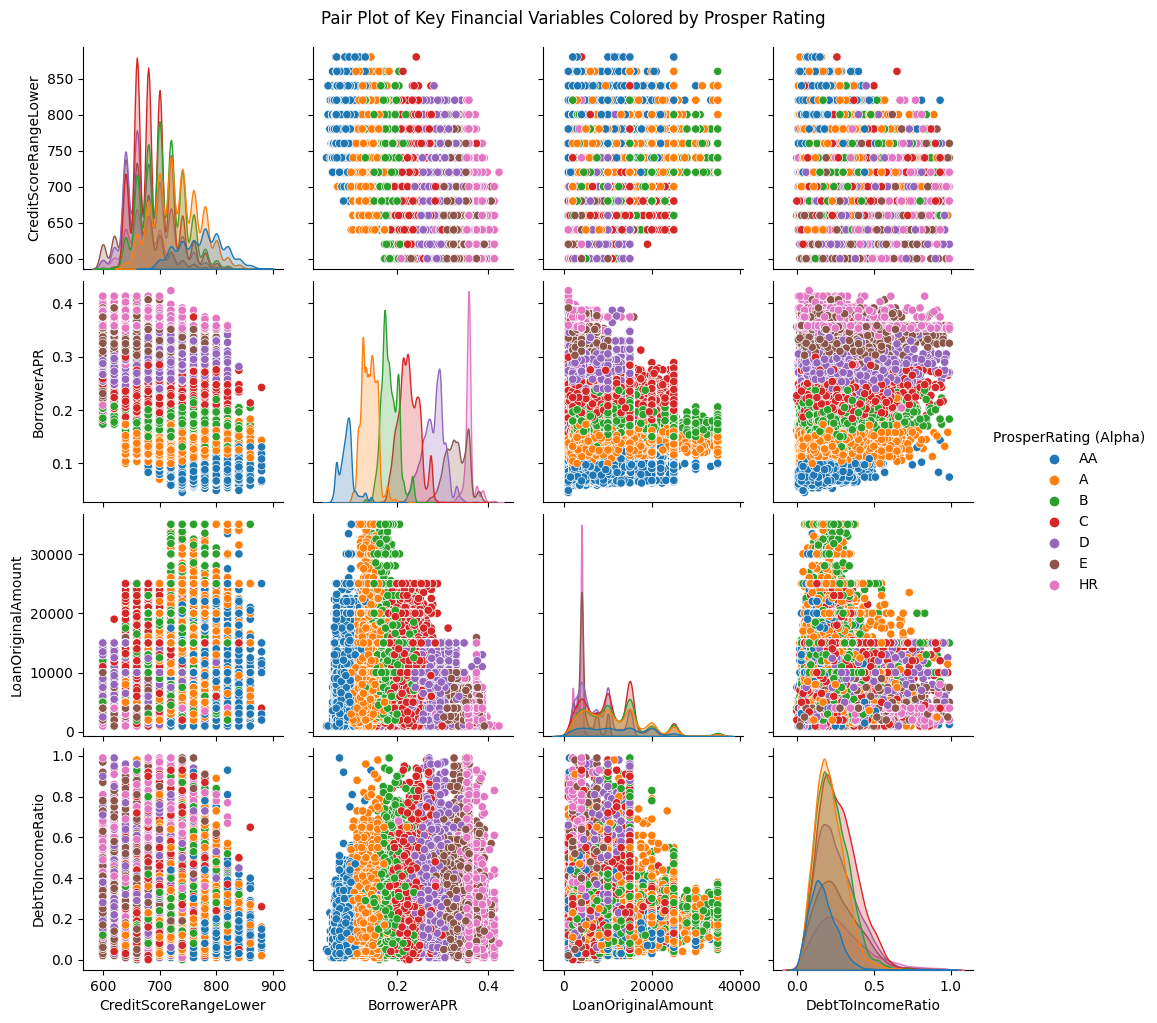

In [26]:
# Pair plot of credit score, BorrowerAPR, loan amount, and Debt-To-Income Ratio

# Filter out rows where DebtToIncomeRatio is 1 or greater
dfloan = dfloan[dfloan['DebtToIncomeRatio'] < 1]

# Reorder the ProsperRating (Alpha) categories
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
dfloan['ProsperRating (Alpha)'] = pd.Categorical(dfloan['ProsperRating (Alpha)'], categories=prosper_rating_order, ordered=True)

# Create the pair plot with the specified order
sns.pairplot(dfloan, vars=['CreditScoreRangeLower', 'BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio'], 
             hue='ProsperRating (Alpha)', palette='tab10', diag_kind='kde', height=2.5)

# Set the title
plt.suptitle('Pair Plot of Key Financial Variables Colored by Prosper Rating', y=1.02)

# Show the plot
plt.show()

Observation - Borrower APR has very clear correlations when you look at credit score, loan amount and debt to income ratio. When looking specifically at the distribution of the ProsperRating while looking at BorrowerAPR, the graph tracks a trend that aligns directly with their respective clusters. 

AA crowds the lower APR, A clusters right above it and B through HR follows in kind.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The ProsperRating tracks very much with all of the upper end of the variables. Higher ProsperRating tracks with lower APR and lower debt-to-income ratio. 

### Were there any interesting or surprising interactions between features?

I was suprised to not see AA prosper ratings on the biggest loans. The ones that did get those loans, they had a lower APR however I expected to see a higher percentage of AA prosper ratings on big loans. Those loans were still populated by high ratings (A and B).

## Conclusions

The analysis shows a strong relationship between the borrow's credit score (we looked at the lower bound) and their APR. As expected, borrowers with higher credit scores had lower APRs, indicating lower perceived risk by the lender. This patter was observed across the scatter plot where most loans with APRs below 0.15 were concentrated among borrowers with credit scores in the 600-800 range. Interestingly, there were also a few high-APR loans for borrowers with good credit scores. This could be due to other risk factors not captured directly in the credit score or specific loan terms negotiated.

The majority of loans were either "Current" or "Completed," suggesting a large portion of borrowers are either actively repaying their loans or have successfully completed repayment. Surprisingly, the number of "Charged Off" loans was relatively high compared to "Past Due" loans. This could suggest that once loans fall behind, they quickly transition to a "Charged Off" status. It would be worth exploring what factors contribute to loans moving into this "Charged Off" status (specifically how long is the average loan past due before changed to charged off).

There was a strong correlation between lower debt-to-income ratios and higher Prosper Ratings. Borrowers with lower debt-to-income ratios tended to have lower APRs and better Prosper Ratings, reflecting a lower risk profile.

One surprising finding was the lack of AA Prosper Ratings on the largest loans. While there were some, the majority of high-value loans were still given to those with A or B ratings. It raises the question of whether the highest-rated borrowers are more conservative in their borrowing amounts or if Prosper has more stringent checks for AA-rated borrowers requesting large loans.